In [1]:
# setting up environment
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from acquire import get_blog_articles, get_news_with_categories
from prepare import basic_clean, tokenize, remove_stopwords, lemmatize

import warnings
warnings.filterwarnings("ignore")

from requests import get
from bs4 import BeautifulSoup
import os

In [2]:
# setting list of additional stopwords
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    """
    A simple function to cleanup text data.
    """
    # setting up lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    # setting stopwords using standard english ones in addition to additional ones from list above
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    # normalizing data
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    # removing unwanted characters
    words = re.sub(r'[^\w\s]', '', text).split()
    # returning all words after changes that are not stopwords
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

# Spam Data
***

# Load the spam data set.

In [3]:
# reading in data
df = pd.read_csv('spam.csv')

# dropping extra columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

# renaming columns
df.columns = ['label','text']

# previewing data
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Create and explore bigrams for the spam data. 

In [4]:
# creating 3 series, ham words, spam words, and all words
# using clean function on each to prep for exploration
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [5]:
# getting value counts of spam bigrams
# ie. how often did they appear in data
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2)).value_counts()

# creating top 10 series of most common spam bigrams
top_10_spam_bigrams = spam_bigrams.head(10)

# checking top 10
top_10_spam_bigrams

(please, call)         44
(customer, service)    27
(1000, cash)           25
(po, box)              24
(guaranteed, call)     23
(prize, guaranteed)    22
(every, week)          19
(send, stop)           19
(chance, win)          19
(await, collection)    19
dtype: int64

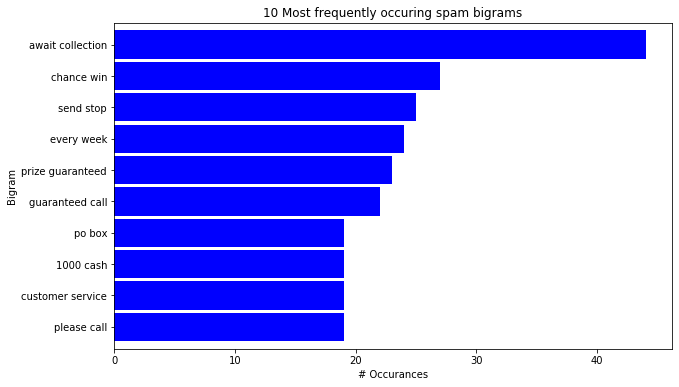

In [6]:
# creating plot of top 10 most common spam bigrams
top_10_spam_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [7]:
# getting value counts of spam bigrams
# ie. how often did they appear in data
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2)).value_counts()

# creating top 10 series of most common ham bigrams
top_10_ham_bigrams = ham_bigrams.head(10)

# checking series
top_10_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       33
(good, morning)    31
(new, year)        30
(im, going)        26
(take, care)       26
(pls, send)        22
dtype: int64

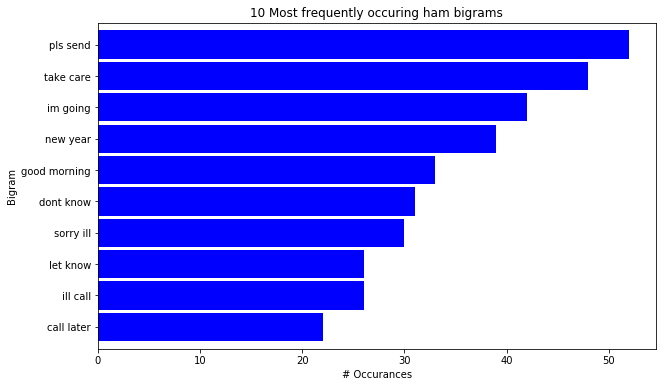

In [8]:
# creating plot of top 10 most common ham bigrams
top_10_ham_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# Visualize them with a word cloud. How do they compare with the ham bigrams?

(-0.5, 799.5, 399.5, -0.5)

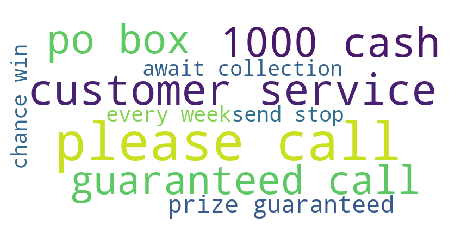

In [9]:
# creating word cloud of top 10 spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

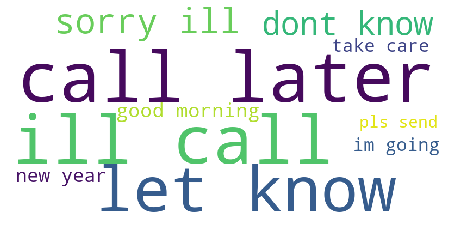

In [10]:
# creating word cloud of top 10 spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

# Is there any overlap in the bigrams for the spam data and the ham data?

In [11]:
# creating empty list
matching_bigrams = []

# using for loop to fill list with bigrams that exist in both spam and ham series'
for x in spam_bigrams.index:
    if x in ham_bigrams.index:
        matching_bigrams.append(x)

print(f'There are {len(matching_bigrams)} bigrams that overlap between the spam and ham data.')

There are 187 bigrams that overlap between the spam and ham data.


# Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [12]:
# creating trigram series from spam words
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3)).value_counts()

# creating top 10 series of most common trigrams
top_10_spam_trigrams = spam_trigrams.head(10)

# checking series
top_10_spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(2003, account, statement)    13
(private, 2003, account)      13
(show, 800, unredeemed)       12
(camcorder, reply, call)      12
(guaranteed, 1000, cash)      12
(tone, 4, ur)                 11
dtype: int64

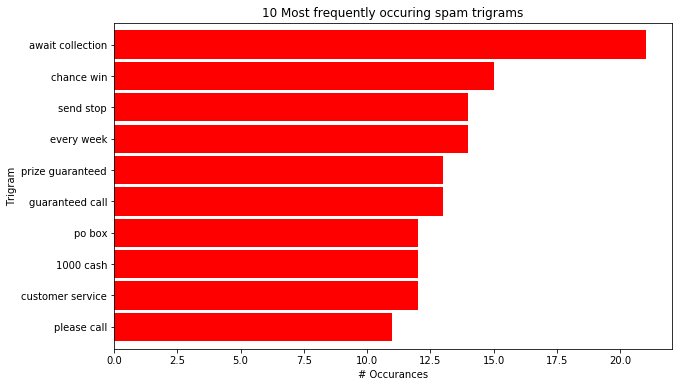

In [13]:
# creating plot of top 10 most common spam trigrams
top_10_spam_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

# setting titles and axis labels
plt.title('10 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [14]:
# creating series of ham trigrams
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts()

# creating series of top 10 most common ham trigrams
top_10_ham_trigrams = ham_trigrams.head(10)

# checking series
top_10_ham_trigrams

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(pick, phone, right)    12
(right, pls, send)      12
(cant, pick, phone)     12
(phone, right, pls)     12
(hi, hi, hi)            11
(x, x, x)                8
dtype: int64

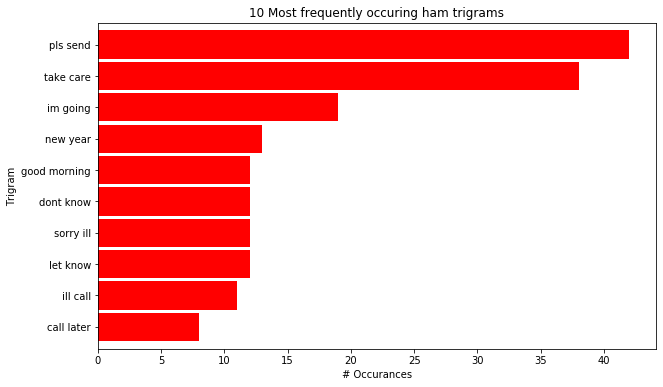

In [15]:
# creating plot of top 10 most common ham trigrams
top_10_ham_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

# setting titles and axis labels
plt.title('10 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# BLOG AND NEW ARTICLES DATA

# Explore the blog articles using the techniques discussed in the exploration lesson.

In [83]:
# creating DF from blog articles
blogdf = pd.DataFrame(get_blog_articles())

# cleaning, tokenizing, removing stopwords and lemmatizing to prepare data
blogdf['article'] = blogdf['article'].apply(basic_clean)
blogdf['article'] = blogdf['article'].apply(tokenize)
blogdf['article'] = blogdf['article'].apply(remove_stopwords)
blogdf['article'] = blogdf['article'].apply(lemmatize)

# dropping title column
blogdf.drop(columns = ['title'], inplace = True)

# checking DF
blogdf

,article
0,rumor true time arrived codeup officially open...
1,dimitri antoniou maggie giust data science big...
2,dimitri antoniou week ago codeup launched imme...
3,sa tech job fair third biannual san antonio te...
4,competitor bootcamps closing model danger prog...


In [84]:
# converting DF article text to series 
blogs = clean(' '.join(blogdf.article))

# getting value counts of blog bigrams
# ie. how often did they appear in data
blog_bigrams = pd.Series(nltk.ngrams(blogs, 2)).value_counts()

# creating top 10 series of most common blog bigrams
top_10_blog_bigrams = blog_bigrams.head(10)

# checking top 10
top_10_blog_bigrams

(data, science)         26
(machine, learning)     14
(data, scientist)       13
(job, fair)              9
(via, giphy)             6
(giphy, myth)            5
(san, antonio)           5
(intelligence, data)     4
(tech, job)              4
(bootcamp, model)        4
dtype: int64

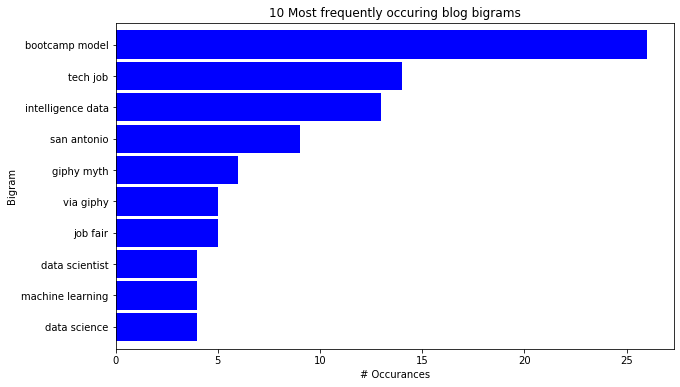

In [86]:
# creating plot of top 10 most common blog bigrams
top_10_blog_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring blog bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_blog_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

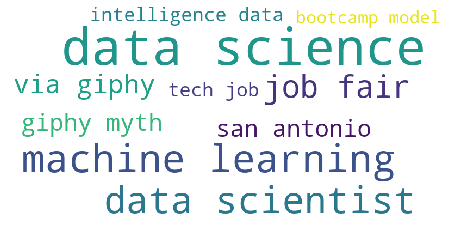

In [87]:
# creating word cloud of top 10 blog bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_blog_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

# Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [44]:
# acquiring news data
news = pd.DataFrame(get_news_with_categories())

# dropping title column
news.drop(columns = ['title'], inplace = True)

# previewing df
news.head()

,article,category
0,The Centre has imposed a 30-day moratorium on ...,business
1,Pfizer’s shares fell as much as 4.5% on Monday...,business
2,Moderna's initial results of late-stage trial ...,business
3,Traders' body CAIT on Tuesday said a proposal ...,business
4,Billionaire Elon Musk added $15 billion to his...,business


In [49]:
# cleaning and creating a separate series for each category of article
business = clean(' '.join(news[news.category == 'business'].article))
sports = clean(' '.join(news[news.category == 'sports'].article))
technology = clean(' '.join(news[news.category == 'technology'].article))
entertainment = clean(' '.join(news[news.category == 'entertainment'].article))

## Business

In [50]:
# getting value counts of business bigrams
# ie. how often did they appear in data
business_bigrams = pd.Series(nltk.ngrams(business, 2)).value_counts()

# creating top 10 series of most common business bigrams
top_10_business_bigrams = business_bigrams.head(10)

# checking top 10
top_10_business_bigrams

(covid19, vaccine)     4
(945, effective)       3
(mitsubishi, motor)    3
(vaccine, 945)         3
(stake, mitsubishi)    3
(said, nissan)         3
(monday, said)         3
(temperature, 28c)     2
(28c, 30)              2
(normal, fridge)       2
dtype: int64

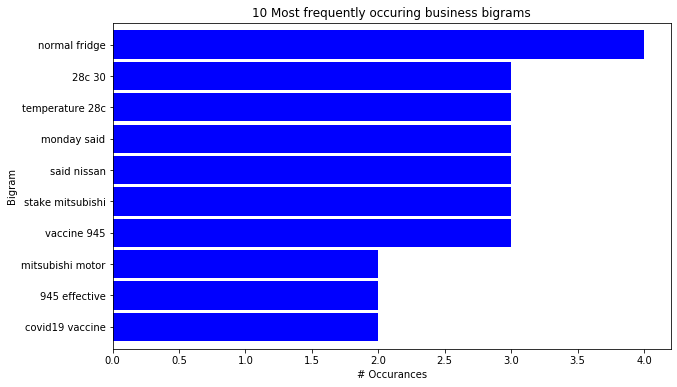

In [54]:
# creating plot of top 10 most common business bigrams
top_10_business_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring business bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_business_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

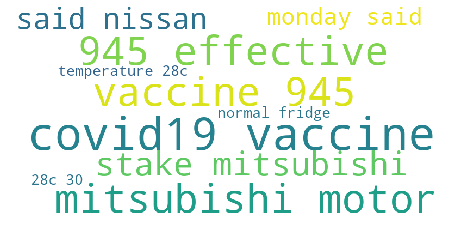

In [58]:
# creating word cloud of top 10 business bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_business_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Sports

In [51]:
# getting value counts of sports bigrams
# ie. how often did they appear in data
sports_bigrams = pd.Series(nltk.ngrams(sports, 2)).value_counts()

# creating top 10 series of most common sports bigrams
top_10_sports_bigrams = sports_bigrams.head(10)

# checking top 10
top_10_sports_bigrams

(virat, kohli)         5
(rohit, sharma)        4
(team, india)          4
(captain, virat)       3
(india, captain)       3
(test, series)         3
(former, australia)    3
(west, indie)          3
(share, picture)       2
(15, lakh)             2
dtype: int64

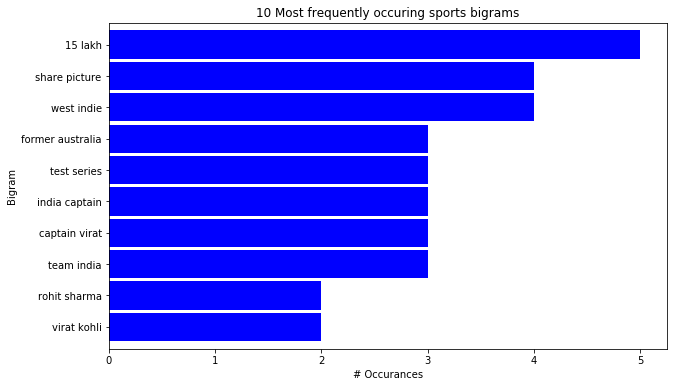

In [55]:
# creating plot of top 10 most common sports bigrams
top_10_sports_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring sports bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_sports_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

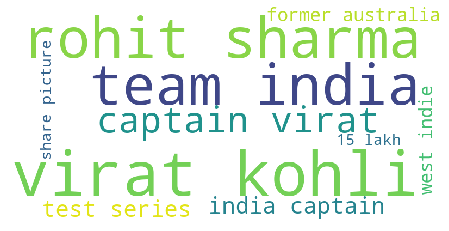

In [59]:
# creating word cloud of top 10 sports bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Technology

In [52]:
# getting value counts of technology bigrams
# ie. how often did they appear in data
technology_bigrams = pd.Series(nltk.ngrams(technology, 2)).value_counts()

# creating top 10 series of most common technology bigrams
top_10_technology_bigrams = technology_bigrams.head(10)

# checking top 10
top_10_technology_bigrams

(social, medium)          4
(kamala, harris)          2
(sp, 500)                 2
(international, space)    2
(500, index)              2
(u, senate)               2
(senate, committee)       2
(apple, product)          2
(new, mexico)             2
(also, reportedly)        2
dtype: int64

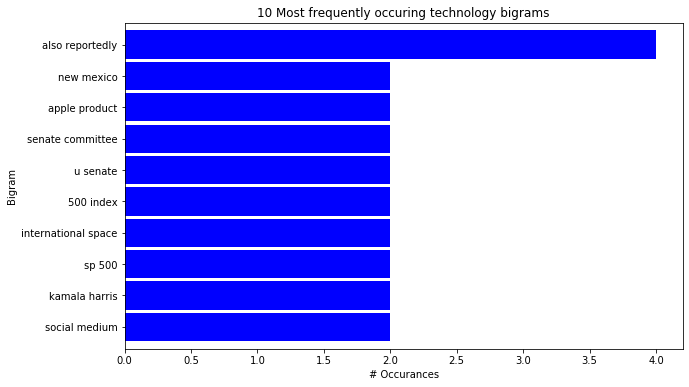

In [56]:
# creating plot of top 10 most common technology bigrams
top_10_technology_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring technology bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_technology_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

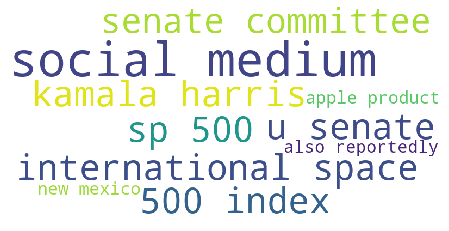

In [60]:
# creating word cloud of top 10 technology bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_technology_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Entertainment

In [53]:
# getting value counts of entertainment bigrams
# ie. how often did they appear in data
entertainment_bigrams = pd.Series(nltk.ngrams(entertainment, 2)).value_counts()

# creating top 10 series of most common entertainment bigrams
top_10_entertainment_bigrams = entertainment_bigrams.head(10)

# checking top 10
top_10_entertainment_bigrams

(feel, comfortable)    2
(made, feel)           2
(roy, kapur)           2
(aditya, roy)          2
(suriya, sivakumar)    2
(award, comedy)        2
(kissing, booth)       2
(late, actor)          2
(france, highest)      2
(indian, film)         2
dtype: int64

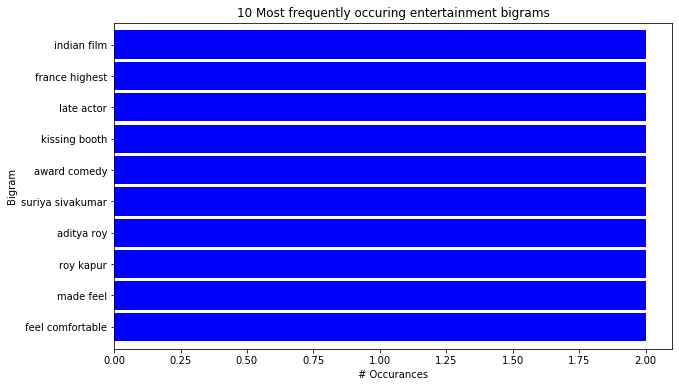

In [57]:
# creating plot of top 10 most common entertainment bigrams
top_10_entertainment_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

# setting title and axis labels
plt.title('10 Most frequently occuring entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# adjusting ticks and labels
ticks, _ = plt.yticks()
labels = top_10_entertainment_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

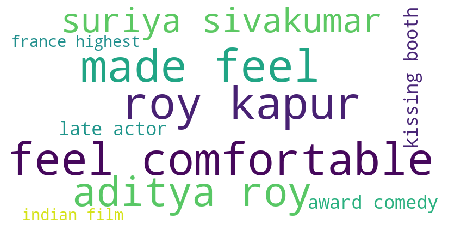

In [61]:
# creating word cloud of top 10 entertainment bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_10_entertainment_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')